# <center><font color = '#DF9166' size = 20 center> **Statistical Modeling: Premium & Claims Prediction**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Vehicle Analysis**](#vehicle_analysis)
6. [**Client Analysis**](#client_analysis)
7. [**Region Analysis**](#region_analysis)
8. [**Policy Analysis**](#policy_analysis)
9. [**Trend Analysis**](#trend_analysis)

## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.pardir))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    PowerTransformer,
    FunctionTransformer,
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import shap


In [4]:
from src.preprocess_data import *

In [5]:
sns.set_style("whitegrid")

In [6]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [7]:
DATA_PATH = '../data/raw/MachineLearningRating_v3.txt'

In [8]:
df = pd.read_csv(DATA_PATH, delimiter='|')
df.head(2)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

### General Overview

In [9]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (1000098, 52)


In [10]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

In [11]:
print("Number of Unique Values in Each Column:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in df.columns:
    print(f"{col:>45} | {df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                          UnderwrittenCoverID | 116532
                                     PolicyID | 7000
                             TransactionMonth | 23
                              IsVATRegistered | 2
                                  Citizenship | 4
                                    LegalType | 6
                                        Title | 5
                                     Language | 1
                                         Bank | 11
                                  AccountType | 3
                                MaritalStatus | 3
                                       Gender | 3
                                      Country | 1
                                     Province | 9
                                   PostalCod

In [12]:
columns_to_convert = ["UnderwrittenCoverID", "PostalCode", "PolicyID", 'IsVATRegistered']
df[columns_to_convert] = df[columns_to_convert].astype('object')
df['CapitalOutstanding'] = df['CapitalOutstanding'].astype('float')

In [13]:
categorical_columns = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth", "IsVATRegistered", 
    "Citizenship", "LegalType", "Title", "Language", "Bank", "AccountType", 
    "MaritalStatus", "Gender", "Country", "Province", "PostalCode", 
    "MainCrestaZone", "SubCrestaZone", "ItemType", "VehicleType", "make", 
    "Model", "bodytype", "VehicleIntroDate", "AlarmImmobiliser", 
    "TrackingDevice", "NewVehicle", "WrittenOff", 
    "Rebuilt", "Converted", "CrossBorder", "TermFrequency", "ExcessSelected", 
    "CoverCategory", "CoverType", "CoverGroup", "Section", "Product", 
    "StatutoryClass", "StatutoryRiskType",
]

numerical_columns = [
    "mmcode", "RegistrationYear", "Cylinders", "cubiccapacity", "kilowatts", 
    "NumberOfDoors", "CustomValueEstimate", "NumberOfVehiclesInFleet", 
    "SumInsured", "CalculatedPremiumPerTerm", "CapitalOutstanding",
    "TotalPremium", "TotalClaims", 
]

### Data Quality Assessment

In [14]:
print("Missing values and their proportions (%):")
missing_data = missing_values_proportions(df)
missing_data

Missing values and their proportions (%):


,Missing Values,Proportion (%)
Bank,145961,14.59
AccountType,40232,4.02
MaritalStatus,8259,0.83
Gender,9536,0.95
mmcode,552,0.06
VehicleType,552,0.06
make,552,0.06
Model,552,0.06
Cylinders,552,0.06
cubiccapacity,552,0.06


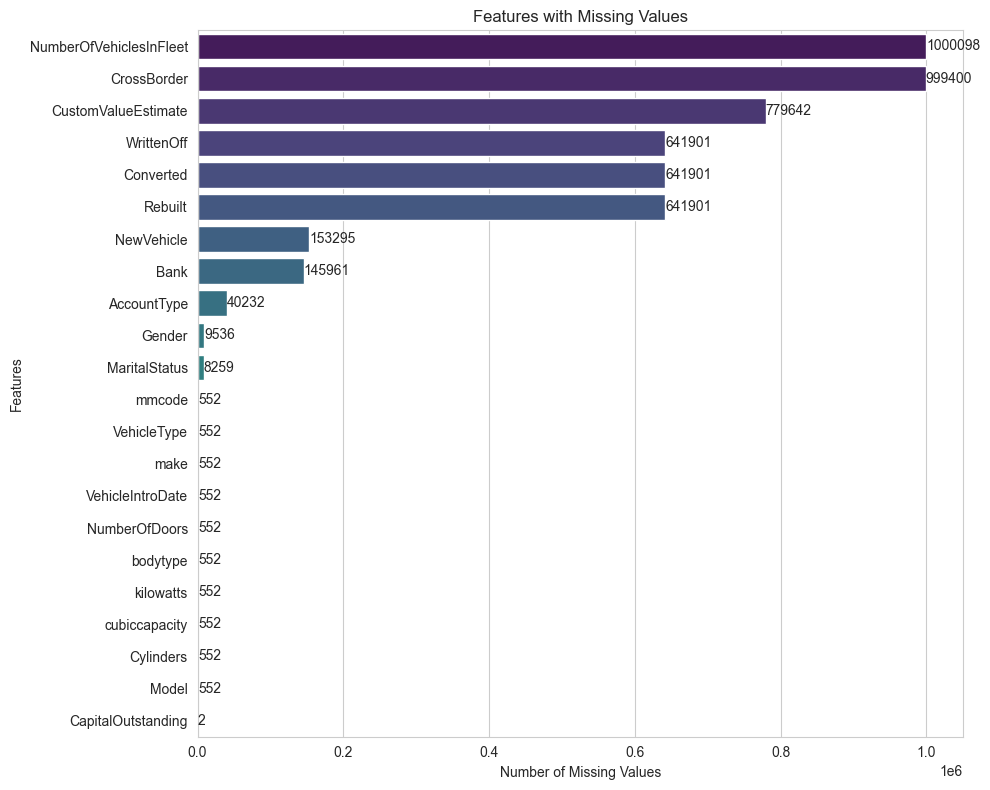

In [15]:
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(y=missing_data.index, x=missing_data['Missing Values'].values, palette='viridis')
plt.title("Features with Missing Values")
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")

for index, value in enumerate(missing_data['Missing Values'].values):
    plt.text(value, index, f'{value}', va='center', ha='left')

plt.tight_layout()
plt.show()

In [16]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Descriptive Statistics

In [17]:
print("Summary statistics for numerical columns:\n")
df[numerical_columns].describe().transpose()

Summary statistics for numerical columns:



,count,mean,std,min,25%,50%,75%,max
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07
NumberOfVehiclesInFleet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumInsured,1000098.0,6.041727e+05,1.508332e+06,1.000000e-02,5.000000e+03,7.500000e+03,2.500000e+05,1.263620e+07
CalculatedPremiumPerTerm,1000098.0,1.178757e+02,3.997017e+02,0.000000e+00,3.224800e+00,8.436900e+00,9.000000e+01,7.442217e+04


In [18]:
print("Summary statistics for categorical columns:\n")
df[categorical_columns].describe(include=['object']).transpose()

Summary statistics for categorical columns:



,count,unique,top,freq
UnderwrittenCoverID,1000098,116532,85639,30
PolicyID,1000098,7000,3870,10400
TransactionMonth,1000098,23,2015-08-01 00:00:00,106747
IsVATRegistered,1000098,2,False,995075
Citizenship,1000098,4,,895210
LegalType,1000098,6,Individual,911929
Title,1000098,5,Mr,933555
Language,1000098,1,English,1000098
Bank,854137,11,First National Bank,260811
AccountType,959866,3,Current account,597938


### Target Variables EDA

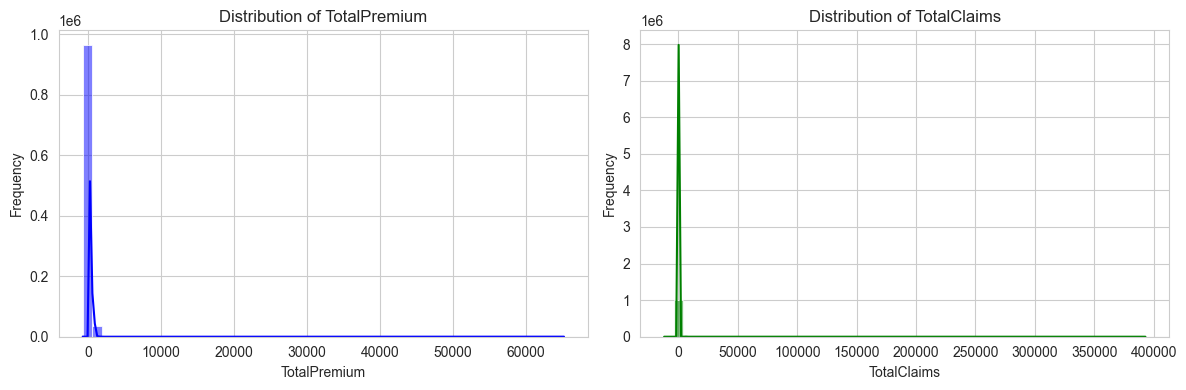

In [19]:
# Histogram of Target Variables

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# TotalPremium distribution
sns.histplot(df['TotalPremium'], bins=50, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribution of TotalPremium')
ax[0].set_xlabel('TotalPremium')
ax[0].set_ylabel('Frequency')

# TotalClaims distribution
sns.histplot(df['TotalClaims'], bins=50, kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribution of TotalClaims')
ax[1].set_xlabel('TotalClaims')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

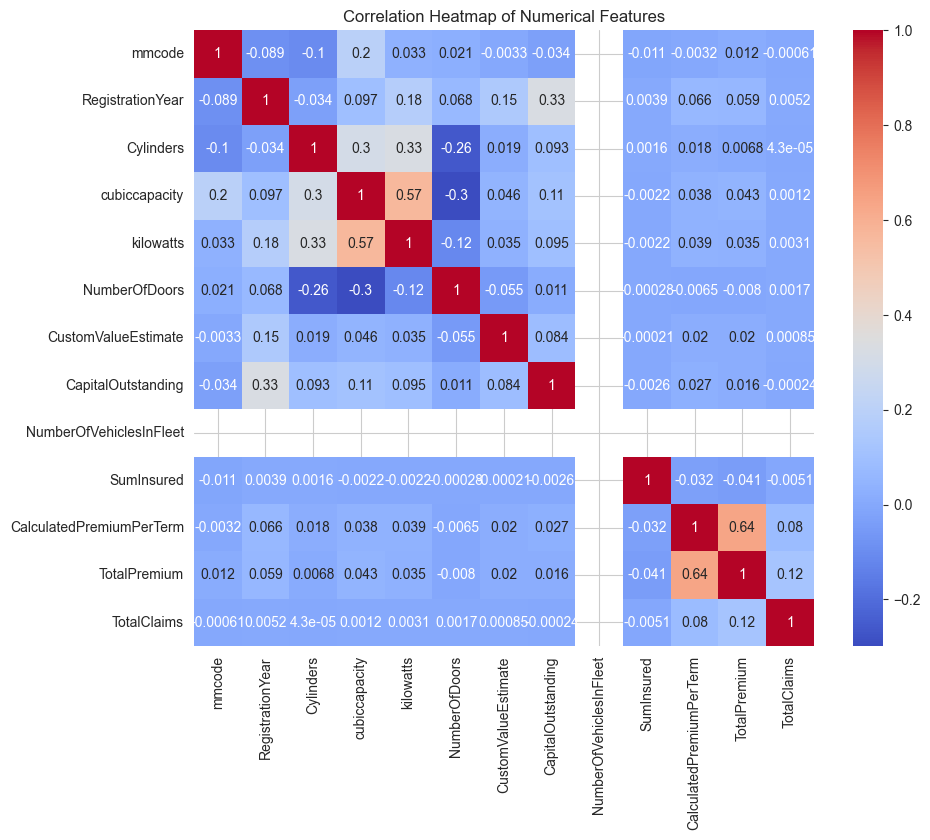

In [20]:
# Correlation Analysis
numeric_features = df.select_dtypes(include=['number']) 
correlation_matrix = numeric_features.corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

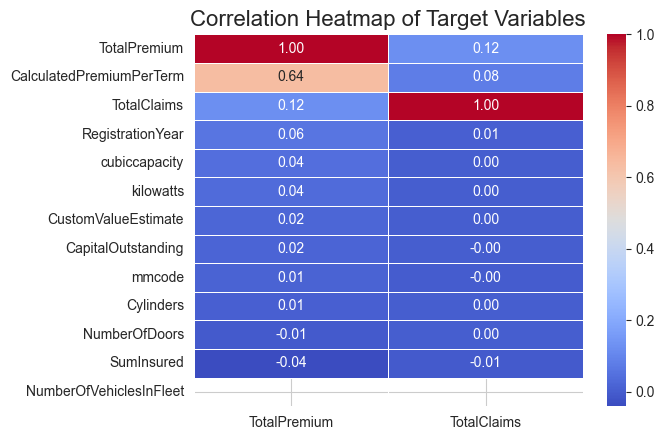

In [21]:
# Highlighting correlations with target variables
target_corr = correlation_matrix[["TotalPremium", "TotalClaims"]].sort_values(
    by="TotalPremium", ascending=False
)

plt.figure(figsize=(7, 4.5))
sns.heatmap(
    target_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5
)
plt.title("Correlation Heatmap of Target Variables", fontsize=16)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights**
- **TotalPremium** correlates strongly with **CalculatedPremiumPerTerm** (0.636) but weakly with **TotalClaims** (0.122).
- **TotalClaims** shows negligible correlations with all variables, including **CalculatedPremiumPerTerm** (0.080).
- **SumInsured** has a weak negative correlation with both targets, warranting further investigation.
- **NumberOfVehiclesInFleet** data is missing and requires attention.
- Prioritize **CalculatedPremiumPerTerm** for premium modeling and address data gaps for deeper insights.

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

### Column Filtering

#### Dropping Columns with Majority Null Values

In [22]:
print("Missing values and their proportions (%):")
missing_values_proportions(df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)
Bank,145961,14.59
AccountType,40232,4.02
MaritalStatus,8259,0.83
Gender,9536,0.95
mmcode,552,0.06
VehicleType,552,0.06
make,552,0.06
Model,552,0.06
Cylinders,552,0.06
cubiccapacity,552,0.06


The columns with over 60% missing data should be removed to reduce noise and unwanted bias through imputation. This ensures the dataset retains only reliable and informative features.

In [23]:
# Identify columns with more than 60% missing data and drop them
threshold = 0.6 * len(df)
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df.drop(columns=columns_to_drop, inplace=True)

# Remove from categorical_columns and numerical_columns
categorical_columns = [col for col in categorical_columns if col not in columns_to_drop]
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


#### Dropping Columns with a Single Unique Value

In [24]:
drop_columns = [
    "Language",
    "Country",
    "ItemType",
    "StatutoryClass",
    "StatutoryRiskType",
]
print("_" * 100, f"{'Column Name':>45} |  No. Unique Values  |  Unique Values", "_" * 100, sep="\n")
for col in drop_columns:
    print(f"{col:>45} | {df[col].nunique():^19} | {df[col].unique()[0]}")

df.drop(columns=drop_columns, inplace=True)

____________________________________________________________________________________________________
                                  Column Name |  No. Unique Values  |  Unique Values
____________________________________________________________________________________________________
                                     Language |          1          | English
                                      Country |          1          | South Africa
                                     ItemType |          1          | Mobility - Motor
                               StatutoryClass |          1          | Commercial
                            StatutoryRiskType |          1          | IFRS Constant


We are dropping columns with only one unique value since:

- **No Predictive Power**: Constant columns do not provide variation, making them irrelevant for distinguishing between different data points.
- **Risk of Overfitting**: Including constant features can contribute to overfitting, where the model memorizes irrelevant patterns specific to the training data.
- **Improved Efficiency**: Reducing the number of features speeds up training and reduces computational cost.
- **Enhanced Interpretability**: Removing irrelevant features simplifies the model, making it easier to interpret and understand.

#### Dropping Indentifier Columns 

In [25]:
drop_columns = [
    "UnderwrittenCoverID",
    "PolicyID",
    'PostalCode'
]

print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in drop_columns:
    print(f"{col:>45} | {df[col].nunique()}")
print("_" * 70)

df.drop(columns=drop_columns, inplace=True)


______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                          UnderwrittenCoverID | 116532
                                     PolicyID | 7000
                                   PostalCode | 888
______________________________________________________________________


- **UnderwrittenCoverID**: High cardinality with 116,532 unique values. Likely a unique identifier that does not contribute to predictive patterns. Adds noise rather than value.  
- **PolicyID**: Acts as an identifier with 7,000 unique values. Typically, identifiers do not hold predictive power.  
- **PostalCode**: May have some relevance if geographic trends matter, but requires preprocessing. If no clear correlation with the target, it adds complexity without benefit.

### Handling Outliers

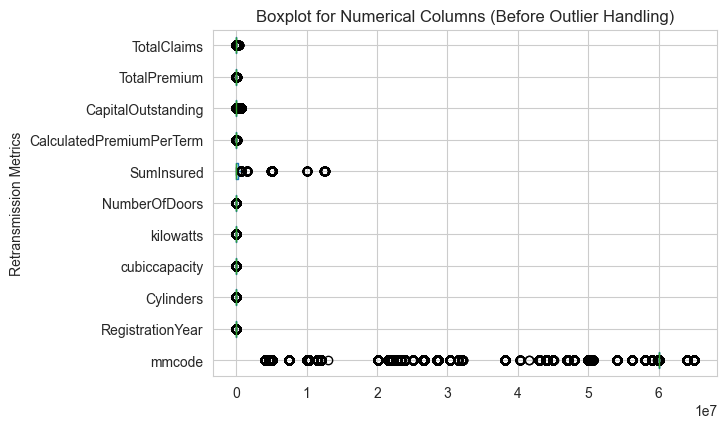

In [26]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(6.5, 4.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (Before Outlier Handling)")
plt.ylabel("Retransmission Metrics")
plt.show()

In [27]:
# Replace outliers with boundaries for all numerical columns
df = handle_outliers(df, numerical_columns, plot_box=False, replace_with="mean")

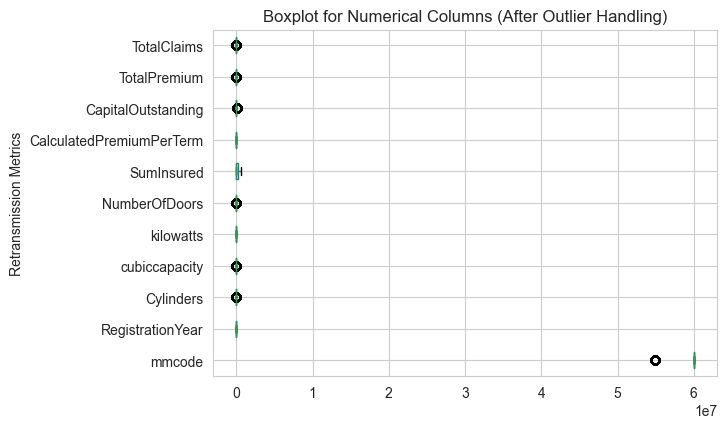

In [28]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(6.5, 4.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (After Outlier Handling)")
plt.ylabel("Retransmission Metrics")
plt.show()

In [29]:
# Check for remaining outliers using Z-Score
print("\nColumns with Potential Outliers After Z-Score Analysis:\n")
for col in numerical_columns:
    z_scores = zscore(df[col])
    outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col:>45}: {outliers} potential outliers")


Columns with Potential Outliers After Z-Score Analysis:

                                       mmcode: 0 potential outliers
                             RegistrationYear: 5858 potential outliers
                                    Cylinders: 0 potential outliers
                                cubiccapacity: 0 potential outliers
                                    kilowatts: 0 potential outliers
                                NumberOfDoors: 0 potential outliers
                                   SumInsured: 0 potential outliers
                     CalculatedPremiumPerTerm: 9662 potential outliers
                           CapitalOutstanding: 0 potential outliers
                                 TotalPremium: 0 potential outliers
                                  TotalClaims: 2793 potential outliers


## <font color = '#DF9166' size=6>**Data Preparation**<font/><a class = 'anchor' id = 'data_preparation'/>

### Feature Engineering

In [30]:
# Ensure the TransactionMonth column is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Extract the year and month into separate columns
df['Year'] = df['TransactionMonth'].dt.year.astype('object')
df['Month'] = df['TransactionMonth'].dt.month.astype('object')

categorical_columns.extend(['Year', 'Month'])

# Drop the TransactionMonth column
df.drop('TransactionMonth', axis=1, inplace=True)

### Data Pipeline Setup

In [31]:
# Separate features and targets
X = df.drop(columns=["TotalPremium", "TotalClaims"])  # Features
y_total_premium = df["TotalPremium"] 
y_total_claims = df["TotalClaims"]  

df.drop(columns=["TotalPremium", "TotalClaims"], inplace=True)


numerical_columns = [col for col in numerical_columns if col in df.columns]
categorical_columns = [col for col in categorical_columns if col in df.columns]

In [32]:
# Create Numerical and Categorical Data Pipelines
numerical_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
        ("scaler", StandardScaler()),  # Scale features
    ]
)

categorical_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
        ("onehot", OneHotEncoder()),
    ]
)

# Combine both pipelines into a ColumnTransformer
data_preprocessor = ColumnTransformer(
    [
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

In [33]:
# Apply preprocessing pipelines to the data
X_transformed = data_preprocessor.fit_transform(X)

In [34]:
# Split the data into train and test sets
X_train_premium, X_test_premium, y_train_premium, y_test_premium = train_test_split(
    X_transformed, y_total_premium, test_size=0.3, random_state=42
)

X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(
    X_transformed, y_total_claims, test_size=0.3, random_state=42
)


In [35]:
# Overview of the transformed data
print(f"TotalPremium - Training set shape: {X_train_premium.shape}")
print(f"TotalPremium - Test set shape: {X_test_premium.shape}")

print(f"TotalClaims - Training set shape: {X_train_claims.shape}")
print(f"TotalClaims - Test set shape: {X_test_claims.shape}")

TotalPremium - Training set shape: (700068, 874)
TotalPremium - Test set shape: (300030, 874)
TotalClaims - Training set shape: (700068, 874)
TotalClaims - Test set shape: (300030, 874)


## <font color = '#DF9166' size=6>**TotalPremium Modeling**<font/><a class = 'anchor' id = 'TotalPremium_modeling'/>

### Hyperparameter Search Space

In [38]:
# Define models and parameter grids
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],  # Whether to include an intercept
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, use_label_encoder=False),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 6],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0]
        }
    }
}

In [39]:
# Custom scorer (example: negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform randomized search with 5-fold cross-validation for each model
best_models = {}
for model_name, model_info in models.items():
    print(f"Performing Randomized Search with 5-Fold CV for {model_name}...")
    randomized_search = RandomizedSearchCV(
        estimator=model_info["model"],
        param_distributions=model_info["params"],  # Note: `param_distributions` for RandomizedSearchCV
        scoring=scorer,
        cv=3,  # 5-fold cross-validation
        verbose=1,
        n_jobs=-1,
        n_iter=20,  # Number of parameter settings to sample
        random_state=42  # Ensures reproducibility
    )
    randomized_search.fit(X_train_premium, y_train_premium)  # Ensure X_train, y_train are prepared
    best_models[model_name] = randomized_search.best_estimator_
    print(f"Best Parameters for {model_name}: {randomized_search.best_params_}")
    print(f"Best Cross-Validation Score for {model_name}: {randomized_search.best_score_}")

# Display the best models
print("\nBest Models and Parameters:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


Performing Randomized Search with 5-Fold CV for LinearRegression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for LinearRegression: {'fit_intercept': False}
Best Cross-Validation Score for LinearRegression: -328.9039795505177
Performing Randomized Search with 5-Fold CV for RandomForest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
# # Custom scorer (example: negative mean squared error)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)


# # Perform grid search with 5-fold cross-validation for each model
# best_models = {}
# for model_name, model_info in models.items():
#     print(f"Performing Grid Search with 5-Fold CV for {model_name}...")
#     grid_search = GridSearchCV(
#         estimator=model_info["model"],
#         param_grid=model_info["params"],
#         scoring=scorer,
#         cv=5,  # 5-fold cross-validation
#         verbose=1,
#         n_jobs=-1
#     )
#     grid_search.fit(X_train_premium, y_train_premium)  # Ensure X_train, y_train are prepared
#     best_models[model_name] = grid_search.best_estimator_
#     print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best Cross-Validation Score for {model_name}: {grid_search.best_score_}")
 
# # Display the best models
# print("\nBest Models and Parameters:")
# for model_name, model in best_models.items():
#     print(f"{model_name}: {model}")

In [ ]:
# Evaluate on Test Data
print("\nEvaluating on Test Data:")
for model_name, model in best_models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{model_name} Test MSE: {mse}")

In [ ]:


# Define preprocessing for numerical and categorical data
numerical_features = ['cubiccapacity', 'kilowatts', 'SumInsured']  # Example numerical features
categorical_features = ['Province', 'VehicleType']  # Example categorical features

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define parameter grid for the model
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Perform grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate on the test set
test_predictions = grid_search.best_estimator_.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, test_predictions)}")


###

## <font color = '#DF9166' size=6>**TotalClaims Modeling**<font/><a class = 'anchor' id = 'TotalClaims_modeling'/>